# Cargando...

In [ ]:
# -*- coding: utf-8 -*-
#Datasets para Natalia
#https://www.kaggle.com/shawon10/ckplus
#https://github.com/muxspace/facial_expressions

# Librerías propias para las redes neuronales por convolución

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import applications
# Libreria para arreglos multidimensionales
import numpy as np


# Librería para graficar 
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools

# Librerías para obtener métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final
# Rutas de los conjuntos de imagenes
ruta_dataset_entrenamiento = "/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/data4/training"
ruta_dataset_prueba = "/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/data4/test"
ruta_dataset_validacion = "/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/data4/validation"
num_classes = 6

In [ ]:
# Preprocesamiento
#Data aumentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Load Data
train_generator = train_datagen.flow_from_directory(ruta_dataset_entrenamiento,target_size=(350,350),color_mode='grayscale',batch_size=32,class_mode='categorical',shuffle=True)
test_generator = test_datagen.flow_from_directory(ruta_dataset_prueba,target_size=(350,350),color_mode='grayscale',batch_size=1,class_mode='categorical',shuffle=False)
validation_generator = validation_datagen.flow_from_directory(ruta_dataset_validacion,target_size=(350,350),color_mode='grayscale',batch_size=32,class_mode='categorical',shuffle=True)

Found 6848 images belonging to 6 classes.
Found 3388 images belonging to 6 classes.
Found 3410 images belonging to 6 classes.


# Evaluacion

In [ ]:
# Load Model VGG16
model_MobileNet = load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_MobileNet.h5")
model_MobileNetV2 = load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_MobileNetV2.h5")
# model_ResNet50 = load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_VGG19.h5")
model_VGG16 = load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_VGG16.h5")
model_VGG19 = load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_VGG19.h5")
model_miModelo = load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/modeloneurona.h5")


## MI MODELO

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_miModelo.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

3388/3388 [==============================] - 15s 4ms/step - loss: 1.4273 - accuracy: 0.7022
[1.4273192882537842, 0.7021842002868652]


In [ ]:
y_pred_prob =  model_miModelo.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

In [ ]:
y_pred_prob

array([[4.50893454e-02, 1.69787859e-03, 1.17233895e-01, 6.72257066e-01,
        1.49762839e-01, 1.39589384e-02],
       [3.66967320e-02, 1.32311834e-03, 2.34030604e-01, 6.24252260e-01,
        9.40227732e-02, 9.67456121e-03],
       [6.57298565e-02, 8.54946964e-04, 1.14440732e-01, 7.38391042e-01,
        7.41133764e-02, 6.47011632e-03],
       ...,
       [5.04607558e-02, 8.50735014e-05, 4.76797223e-02, 8.55917335e-01,
        8.10041651e-03, 3.77566516e-02],
       [6.25622971e-03, 5.16574755e-06, 2.11437210e-03, 6.55861855e-01,
        1.28333401e-02, 3.22929025e-01],
       [3.93702239e-02, 1.89630417e-04, 7.10094273e-02, 6.62284732e-01,
        2.07404606e-02, 2.06405506e-01]], dtype=float32)

{0: array([0.00000000e+00, 3.00932892e-04, 6.01865784e-04, 6.01865784e-04,
       1.50466446e-03, 1.50466446e-03, 1.80559735e-03, 1.80559735e-03,
       3.00932892e-03, 3.00932892e-03, 9.62985254e-03, 9.62985254e-03,
       1.32410472e-02, 1.32410472e-02, 1.92597051e-02, 1.92597051e-02,
       3.06951550e-02, 3.06951550e-02, 3.34035510e-02, 3.34035510e-02,
       3.79175444e-02, 3.79175444e-02, 4.12278062e-02, 4.12278062e-02,
       4.69455311e-02, 4.69455311e-02, 4.87511285e-02, 4.87511285e-02,
       4.93529943e-02, 4.93529943e-02, 4.96539272e-02, 4.96539272e-02,
       4.99548601e-02, 4.99548601e-02, 5.47697863e-02, 5.47697863e-02,
       5.92837797e-02, 5.92837797e-02, 6.01865784e-02, 6.01865784e-02,
       6.80108336e-02, 6.80108336e-02, 7.37285585e-02, 7.37285585e-02,
       8.84742702e-02, 8.84742702e-02, 8.87752031e-02, 8.87752031e-02,
       8.99789347e-02, 8.99789347e-02, 9.20854649e-02, 9.20854649e-02,
       9.56966596e-02, 9.56966596e-02, 9.59975925e-02, 9.59975925e-02,
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


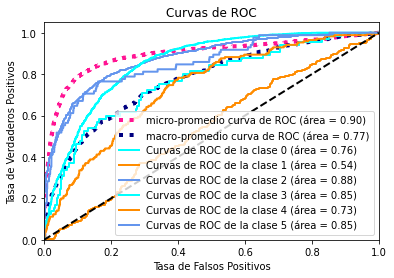

In [ ]:
y_pred_prob =  model_miModelo.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(fpr)
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot((fpr["micro"]), (tpr["micro"]),
         label='micro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curvas de ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas de ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.702184


In [ ]:
print(test_generator.classes)
print(y_pred_classes)

[0 0 0 ... 5 5 5]
[3 3 3 ... 3 3 3]


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Precision:', precision)

Precision: 0.35571375467848715


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.310421


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('F1 score: %f' % f1)

F1 score: 0.308465


In [ ]:
# kappa
kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.488760


In [ ]:
# confusion matrix
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

[[   4    0   26   32    0    3]
 [   0    0   82  118    0    0]
 [   3    0 1151  297    0    3]
 [   8    0  185 1211    1    9]
 [   0    0   74   96    0    0]
 [   1    0   14   57    0   13]]


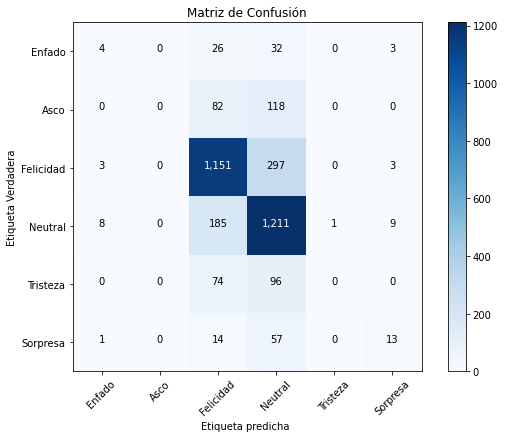

In [ ]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ["Enfado","Asco","Felicidad","Neutral","Tristeza","Sorpresa"]

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()

## MobileNet

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_MobileNet.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

3388/3388 [==============================] - 1189s 351ms/step - loss: 2.0830 - accuracy: 0.6842
[2.0829567909240723, 0.6841794848442078]


In [ ]:
y_pred_prob =  model_MobileNet.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

In [ ]:
y_pred_prob

array([[3.48488824e-03, 6.84407642e-10, 4.78054816e-03, 9.65486944e-01,
        2.53650025e-02, 8.82605906e-04],
       [8.23976588e-04, 1.28639874e-06, 7.48583721e-03, 8.88822794e-01,
        1.02707751e-01, 1.58360330e-04],
       [1.24932628e-03, 6.59009416e-08, 4.60451283e-02, 7.18132496e-01,
        2.34370530e-01, 2.02383351e-04],
       ...,
       [1.42553998e-02, 5.56484956e-08, 7.57032558e-02, 7.89143264e-01,
        2.96897866e-04, 1.20601125e-01],
       [1.53170658e-05, 2.27869396e-14, 7.30508240e-04, 5.65110087e-01,
        1.15947798e-02, 4.22549337e-01],
       [8.27167009e-04, 1.33802136e-10, 1.98827192e-01, 7.14617550e-01,
        7.87767470e-02, 6.95138657e-03]], dtype=float32)

{0: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.01865784e-04,
       6.01865784e-04, 1.50466446e-03, 1.50466446e-03, 2.70839603e-03,
       2.70839603e-03, 5.11585916e-03, 5.11585916e-03, 5.71772495e-03,
       5.71772495e-03, 6.31959073e-03, 6.31959073e-03, 7.82425519e-03,
       7.82425519e-03, 8.12518808e-03, 8.12518808e-03, 1.02317183e-02,
       1.02317183e-02, 1.50466446e-02, 1.50466446e-02, 1.56485104e-02,
       1.56485104e-02, 1.62503762e-02, 1.62503762e-02, 1.71531748e-02,
       1.71531748e-02, 2.40746314e-02, 2.40746314e-02, 2.64820945e-02,
       2.64820945e-02, 3.94222088e-02, 3.94222088e-02, 4.75473969e-02,
       4.75473969e-02, 5.20613903e-02, 5.20613903e-02, 7.07192296e-02,
       7.07192296e-02, 8.03490822e-02, 8.03490822e-02, 8.72705387e-02,
       8.72705387e-02, 1.03219982e-01, 1.03219982e-01, 1.06229311e-01,
       1.06229311e-01, 1.09238640e-01, 1.09238640e-01, 1.24586217e-01,
       1.24586217e-01, 1.34517003e-01, 1.34517003e-01, 1.40535661e-01,
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


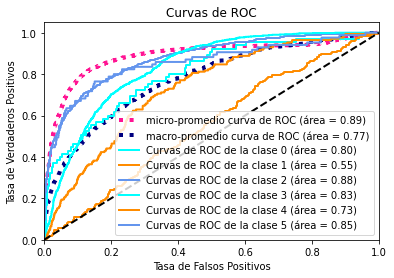

In [ ]:
y_pred_prob =  model_MobileNet.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(fpr)
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot((fpr["micro"]), (tpr["micro"]),
         label='micro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curvas de ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas de ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.684179


In [ ]:
print(test_generator.classes)
print(y_pred_classes)

[0 0 0 ... 5 5 5]
[3 3 3 ... 3 3 3]


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Precision:', precision)

Precision: 0.40615240212970694


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.348207


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('F1 score: %f' % f1)

F1 score: 0.351929


In [ ]:
# kappa
kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.466397


In [ ]:
# confusion matrix
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

[[  17    0   17   31    0    0]
 [   7    0   49  139    5    0]
 [  14    0 1030  399   10    1]
 [  14    0  129 1250   12    9]
 [   5    0   44  119    2    0]
 [   4    0    8   54    0   19]]


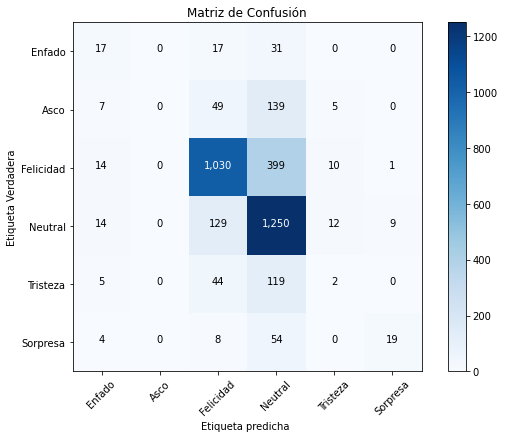

In [ ]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ["Enfado","Asco","Felicidad","Neutral","Tristeza","Sorpresa"]

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()

## MobileNetV2

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_MobileNetV2.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

3388/3388 [==============================] - 19s 6ms/step - loss: 1.6241 - accuracy: 0.6877
[1.6241077184677124, 0.6877213716506958]


In [ ]:
y_pred_prob =  model_MobileNetV2.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

In [ ]:
y_pred_prob

array([[2.6640299e-01, 2.9696716e-04, 5.8773183e-03, 7.0854253e-01,
        1.7404033e-02, 1.4761541e-03],
       [4.9463240e-03, 4.0807096e-05, 1.3977552e-02, 9.2091781e-01,
        5.9986211e-02, 1.3124791e-04],
       [3.5953693e-02, 2.0226727e-05, 4.1013756e-01, 5.0539130e-01,
        4.7925908e-02, 5.7126372e-04],
       ...,
       [1.7152764e-01, 6.0493163e-05, 7.1374923e-02, 6.3847166e-01,
        1.1829305e-03, 1.1738236e-01],
       [9.6000447e-05, 1.5177242e-05, 4.7374642e-04, 8.0269319e-01,
        7.1616031e-02, 1.2510586e-01],
       [1.1067459e-02, 5.8889225e-05, 6.7690265e-01, 2.8726482e-01,
        1.2595605e-02, 1.2110621e-02]], dtype=float32)

{0: array([0.00000000e+00, 3.00932892e-04, 6.01865784e-04, 6.01865784e-04,
       1.20373157e-03, 1.20373157e-03, 1.50466446e-03, 1.50466446e-03,
       1.80559735e-03, 1.80559735e-03, 2.10653024e-03, 2.10653024e-03,
       3.00932892e-03, 3.00932892e-03, 3.61119470e-03, 3.61119470e-03,
       3.91212760e-03, 3.91212760e-03, 4.81492627e-03, 4.81492627e-03,
       5.71772495e-03, 5.71772495e-03, 6.01865784e-03, 6.01865784e-03,
       8.42612098e-03, 8.42612098e-03, 9.32891965e-03, 9.32891965e-03,
       9.93078543e-03, 9.93078543e-03, 2.01625038e-02, 2.01625038e-02,
       2.94914234e-02, 2.94914234e-02, 3.06951550e-02, 3.06951550e-02,
       3.40054168e-02, 3.40054168e-02, 3.79175444e-02, 3.79175444e-02,
       4.21306049e-02, 4.21306049e-02, 4.39362022e-02, 4.39362022e-02,
       4.99548601e-02, 4.99548601e-02, 5.05567259e-02, 5.05567259e-02,
       5.50707192e-02, 5.50707192e-02, 5.80800481e-02, 5.80800481e-02,
       7.13210954e-02, 7.13210954e-02, 7.22238941e-02, 7.22238941e-02,
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


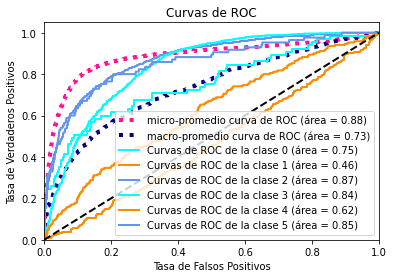

In [ ]:
y_pred_prob =  model_MobileNetV2.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(fpr)
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot((fpr["micro"]), (tpr["micro"]),
         label='micro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curvas de ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas de ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.687721


In [ ]:
print(test_generator.classes)
print(y_pred_classes)

[0 0 0 ... 5 5 5]
[3 3 3 ... 3 3 2]


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Precision:', precision)

Precision: 0.36075588031433625


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.344975


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('F1 score: %f' % f1)

F1 score: 0.335936


In [ ]:
# kappa
kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.474333


In [ ]:
# confusion matrix
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

[[  16    0   20   26    0    3]
 [   2    0   83  115    0    0]
 [  23    0 1140  281    6    4]
 [  37    0  201 1154    6   16]
 [   4    0   67   95    2    2]
 [   5    0   11   51    0   18]]


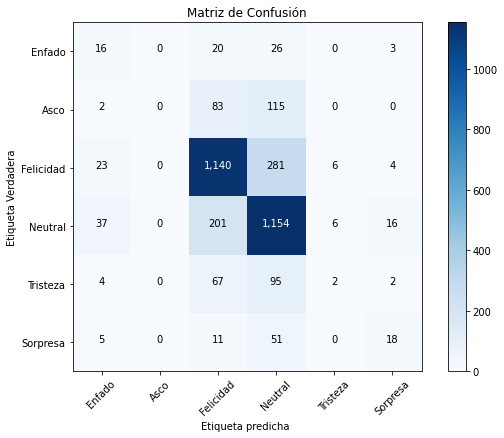

In [ ]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ["Enfado","Asco","Felicidad","Neutral","Tristeza","Sorpresa"]

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()


## VGG16

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_VGG16.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

3388/3388 [==============================] - 40s 12ms/step - loss: 1.8959 - accuracy: 0.6305
[1.8958730697631836, 0.6304604411125183]


In [ ]:
y_pred_prob =  model_VGG16.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

In [ ]:
y_pred_prob

array([[1.30094877e-02, 6.65632854e-07, 6.05514757e-02, 9.22541678e-01,
        2.37004436e-03, 1.52675807e-03],
       [1.24597484e-02, 1.28582406e-06, 2.43038639e-01, 7.29809403e-01,
        8.04513227e-03, 6.64582290e-03],
       [7.26789841e-03, 3.14329384e-07, 2.36658826e-01, 7.43569136e-01,
        5.73511282e-03, 6.76871138e-03],
       ...,
       [3.76503989e-02, 1.11590125e-05, 5.01727939e-01, 4.10643786e-01,
        2.96215210e-02, 2.03451850e-02],
       [2.14222283e-03, 3.35539653e-07, 1.54285710e-02, 9.71935511e-01,
        1.51599385e-03, 8.97745695e-03],
       [1.03109032e-01, 8.12027281e-07, 1.58944994e-01, 6.91565156e-01,
        2.49761008e-02, 2.14038976e-02]], dtype=float32)

{0: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00932892e-04,
       3.00932892e-04, 1.20373157e-03, 1.20373157e-03, 3.00932892e-03,
       3.00932892e-03, 1.02317183e-02, 1.02317183e-02, 1.17363828e-02,
       1.17363828e-02, 1.95606380e-02, 1.95606380e-02, 2.46764971e-02,
       2.46764971e-02, 2.55792958e-02, 2.55792958e-02, 3.28016852e-02,
       3.28016852e-02, 4.03250075e-02, 4.03250075e-02, 4.57417996e-02,
       4.57417996e-02, 5.74781824e-02, 5.74781824e-02, 5.92837797e-02,
       5.92837797e-02, 6.47005718e-02, 6.47005718e-02, 8.24556124e-02,
       8.24556124e-02, 1.03520915e-01, 1.03520915e-01, 1.10442371e-01,
       1.10442371e-01, 1.11345170e-01, 1.11345170e-01, 1.31808607e-01,
       1.31808607e-01, 1.41739392e-01, 1.41739392e-01, 1.45952453e-01,
       1.45952453e-01, 1.50466446e-01, 1.50466446e-01, 1.61600963e-01,
       1.61600963e-01, 2.08847427e-01, 2.08847427e-01, 2.28708998e-01,
       2.28708998e-01, 2.43755642e-01, 2.43755642e-01, 2.56695757e-01,
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


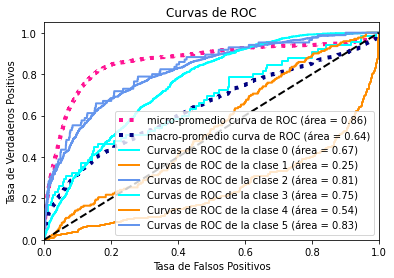

In [ ]:
y_pred_prob =  model_VGG16.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(fpr)
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot((fpr["micro"]), (tpr["micro"]),
         label='micro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curvas de ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas de ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.630460


In [ ]:
print(test_generator.classes)
print(y_pred_classes)

[0 0 0 ... 5 5 5]
[3 3 3 ... 2 3 3]


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Precision:', precision)

Precision: 0.5002299654490204


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.271405


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('F1 score: %f' % f1)

F1 score: 0.269597


In [ ]:
# kappa
kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.362590


In [ ]:
# confusion matrix
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

[[   7    0   24   34    0    0]
 [   0    0   40  160    0    0]
 [   0    0  930  524    0    0]
 [   2    0  216 1196    0    0]
 [   1    0   43  126    0    0]
 [   0    0   14   68    0    3]]


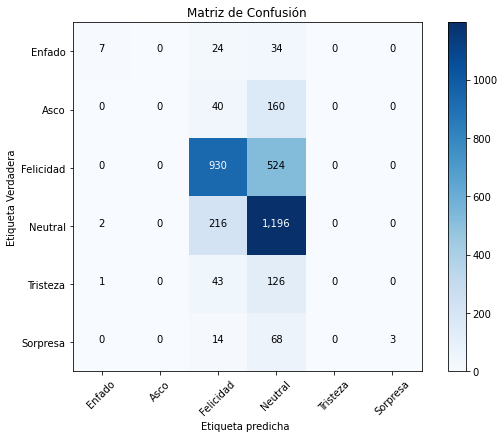

In [ ]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ["Enfado","Asco","Felicidad","Neutral","Tristeza","Sorpresa"]

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()

## VGG19

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_VGG19.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

3388/3388 [==============================] - 48s 14ms/step - loss: 1.9795 - accuracy: 0.6095
[1.9794838428497314, 0.6095041036605835]


In [ ]:
y_pred_prob =  model_VGG19.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

In [ ]:
y_pred_prob

array([[3.28474417e-02, 2.82216366e-08, 4.62356284e-02, 9.10129964e-01,
        1.71814591e-03, 9.06868745e-03],
       [3.81845683e-02, 9.12321454e-08, 4.98646587e-01, 4.35387611e-01,
        1.84303690e-02, 9.35073756e-03],
       [3.22286300e-02, 3.21490461e-08, 3.97506118e-01, 5.48862159e-01,
        1.34204431e-02, 7.98255391e-03],
       ...,
       [5.71656786e-02, 9.59349336e-07, 2.64666736e-01, 6.23610258e-01,
        2.86419839e-02, 2.59144977e-02],
       [4.41364758e-03, 1.02847316e-07, 1.26298130e-01, 8.34947348e-01,
        1.33983640e-03, 3.30009721e-02],
       [1.16980761e-01, 2.28203909e-08, 2.51760572e-01, 6.09896123e-01,
        6.16095727e-03, 1.52016021e-02]], dtype=float32)

{0: array([0.00000000e+00, 0.00000000e+00, 9.02798676e-04, 9.02798676e-04,
       3.31026181e-03, 3.31026181e-03, 7.22238941e-03, 7.22238941e-03,
       9.32891965e-03, 9.32891965e-03, 1.05326512e-02, 1.05326512e-02,
       1.26391815e-02, 1.26391815e-02, 3.12970208e-02, 3.12970208e-02,
       3.37044839e-02, 3.37044839e-02, 3.46072826e-02, 3.46072826e-02,
       3.49082155e-02, 3.49082155e-02, 3.55100813e-02, 3.55100813e-02,
       3.61119470e-02, 3.61119470e-02, 4.03250075e-02, 4.03250075e-02,
       6.07884442e-02, 6.07884442e-02, 6.28949744e-02, 6.28949744e-02,
       6.74089678e-02, 6.74089678e-02, 6.83117665e-02, 6.83117665e-02,
       7.16220283e-02, 7.16220283e-02, 1.00812519e-01, 1.00812519e-01,
       1.04724646e-01, 1.04724646e-01, 1.41438459e-01, 1.41438459e-01,
       1.50466446e-01, 1.50466446e-01, 1.62503762e-01, 1.62503762e-01,
       1.65212158e-01, 1.65212158e-01, 2.18477280e-01, 2.18477280e-01,
       2.37135119e-01, 2.37135119e-01, 2.44658441e-01, 2.44658441e-01,
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


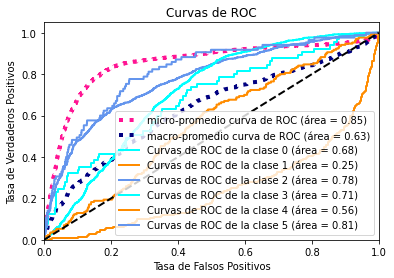

In [ ]:
y_pred_prob =  model_VGG19.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(fpr)
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot((fpr["micro"]), (tpr["micro"]),
         label='micro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curvas de ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas de ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.609504


In [ ]:
print(test_generator.classes)
print(y_pred_classes)

[0 0 0 ... 5 5 5]
[3 2 3 ... 3 3 3]


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Precision:', precision)

Precision: 0.31769107531960566


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.247054


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('F1 score: %f' % f1)

F1 score: 0.233345


In [ ]:
# kappa
kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.325337


In [ ]:
# confusion matrix
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

[[   2    0   28   35    0    0]
 [   0    0   61  139    0    0]
 [   2    0  950  502    0    0]
 [   1    0  299 1112    0    2]
 [   1    0   54  115    0    0]
 [   0    0   13   71    0    1]]


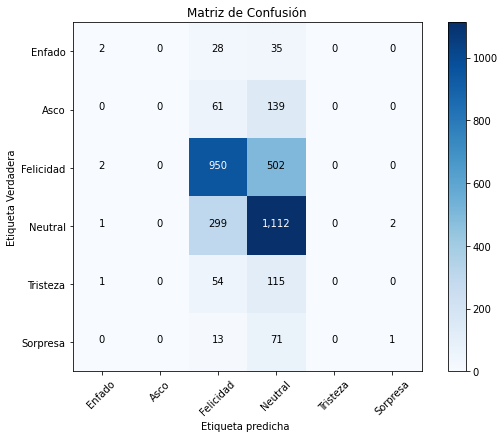

In [ ]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ["Enfado","Asco","Felicidad","Neutral","Tristeza","Sorpresa"]

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()